In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_em = pd.read_csv("Datasets/Song_Lyrics_dataset.csv")
data_fe = pd.read_csv("Datasets/Song.csv")
data_fe = data_fe[pd.notnull(data_fe["Lyric"])]

In [3]:
data_em["Emotion"] = data_em["Emotion"].replace(["fear"], "Fear")

In [4]:
data_fe = data_fe[["Lyric","Feeling"]]
data_em = data_em[["Lyric", "Emotion"]]
data_fe.columns = ["Lyric", "Emotion"]

<AxesSubplot:xlabel='Emotion'>

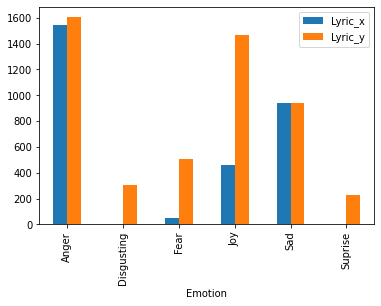

In [5]:
#plot datasets distributions
d1 = data_fe.groupby("Emotion").count().reset_index()
d2 = data_em.groupby("Emotion").count().reset_index()
pd.merge(d1, d2, on = "Emotion").plot.bar(x = 'Emotion')


In [6]:
data_filler = data_em[(data_em["Emotion"] == "Fear") | (data_em["Emotion"] == "Sad") | 
                      (data_em["Emotion"] == "Joy")]

In [7]:
data = pd.concat([data_fe, data_filler], ignore_index=True)
data.shape

(5917, 2)

<AxesSubplot:xlabel='Emotion'>

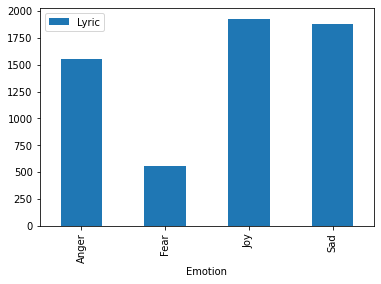

In [8]:
data = data[(data["Emotion"] == "Fear") | (data["Emotion"] == "Sad") | (data["Emotion"] == "Joy") 
            | (data["Emotion"] == "Anger")]
data.groupby("Emotion").count().plot(kind = "bar")

<AxesSubplot:xlabel='Emotion'>

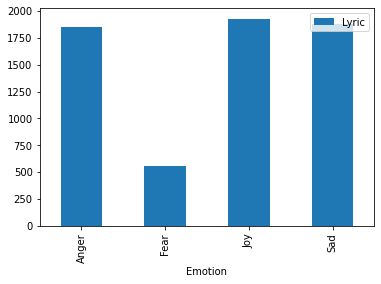

In [9]:
data_ang = data_em[data_em["Emotion"] == "Anger"]
data_ang = data_ang.sample(n = 300)
data1 = pd.concat([data, data_ang], ignore_index=True)
data1.groupby("Emotion").count().plot(kind = "bar")

Joy      1926
Sad      1880
Anger    1848
Fear     1635
Name: Emotion, dtype: int64

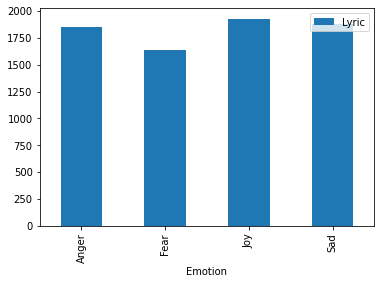

In [23]:
isear = pd.read_csv("Datasets/isear.csv")
isear = isear[isear["Emotion"] == "fear"]
isear["Emotion"] = train.replace(["fear"], "Fear")
isear.columns = ["Emotion","Lyric"]
data = pd.concat([data1, isear])

data.groupby("Emotion").count().plot(kind = "bar")
data["Emotion"].value_counts()

In [33]:
data.to_csv("Datasets/LyricEmotion.csv", index = False)